Install Julia in Ubuntu
https://ferrolho.github.io/blog/2019-01-26/how-to-install-julia-on-ubuntu

Add Julia Kernel to Jupyter
https://datatofish.com/add-julia-to-jupyter/

Compute Poincare surface of sections
https://juliadynamics.github.io/DynamicalSystems.jl/latest/chaos/orbitdiagram/#Poincar%C3%A9-Surface-of-Section-1

Error with `Plot`
https://github.com/JuliaPlots/Plots.jl/issues/1613

Adding poackages in Julia 

```julia
import Pkg; Pkg.add("PyPlot")

import Pkg; Pkg.add("Plots")
```

Using built-in systems

In [ ]:
using DynamicalSystems, PyPlot

In [3]:
system = Systems.henonheiles()
plane = (1, 0.0)
t_final = 50000.0
u0 = [0.0, -0.25, 0.42081, 0.0] #initial state

4-element Array{Float64,1}:
  0.0
 -0.25
  0.42081
  0.0

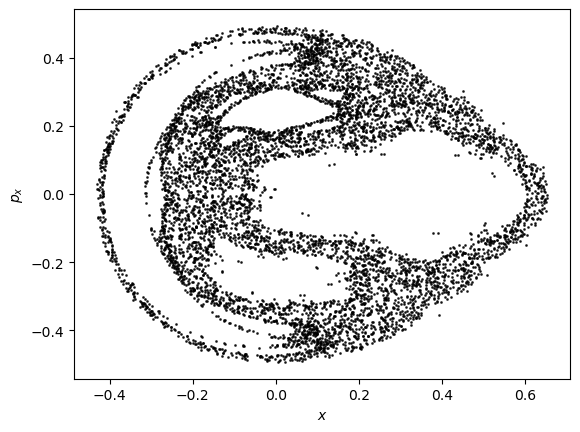

PyObject Text(25.0, 0.5, '$p_x$')

In [41]:
figure()
psos = poincaresos(system, plane, t_final; u0 = u0)
scatter(psos[:, 2], psos[:, 4], s = 1.0, color=:black, alpha=0.75)
xlabel("\$x\$"); ylabel("\$p_x\$")

Using my own system

In [7]:
PARAMETERS = [1/2,1,1]

3-element Array{Float64,1}:
 0.5
 1.0
 1.0

In [8]:
using DynamicalSystems # also exports relevant StaticArrays names
# DvdW system
# Equations of motion:
@inline @inbounds function cirque_vector_field(u, PARAMETERS, t)
    # dimensions
    x, y, px, py = u
    # parameters
    W0, k, d = PARAMETERS
    # hamilton eqs
    dx  = px
    dy  = py
    dpx = -6*W0*k^6( (x - d)/((x - d)^2 + y^2 + k^2)^4 + (x + d)/((x + d)^2 + y^2 + k^2)^4 )
    dpy = -6*W0*k^6( 1/((x - d)^2 + y^2 + k^2)^4 + 1/((x + d)^2 + y^2 + k^2)^4 )*y
    return SVector{4}(dx, dy, dpx, dpy)
end

cirque_vector_field (generic function with 1 method)

In [9]:
function cirque_potential(positions, PARAMETERS)
    x, y = transpose(positions)
    # Function parameters
    W0, k, d = PARAMETERS
    # Potential energy function
    V = -W0*(k^6) * ( 1/((x + d)^2 + y^2 + k^2)^3 + 1/((x - d)^2 + y^2 + k^2)^3 )
    return V
end

cirque_potential (generic function with 1 method)

In [10]:
#define anonymous func
potential_energy = positions -> cirque_potential(positions, PARAMETERS)

#9 (generic function with 1 method)

In [11]:
function energy_conservation_condition(phase_space_axes, H0, potential_energy, momentum_sign)
    N_dim = length(phase_space_axes[1])
    phase_space_positions = [u[1:div(N_dim,2)] for u in phase_space_axes]
    phase_space_momenta = [u[div(N_dim,2)+1:end] for u in phase_space_axes]
    V = potential_energy.(phase_space_positions)
    A = sqrt.(2*(H0 .- V))
    B = [float(sum(p.^2)) for p in phase_space_momenta]
    points_dims_remaining = momentum_sign * (A - B)
    return points_dims_remaining
end

energy_conservation_condition (generic function with 1 method)

In [18]:
# Initial condition
H0 = -0.1

x0 = 0
y0 = 0
px0 = 0
py0 = -0.22360679774997894

u0 = [[x0, y0, px0, py0]]

1-element Array{Array{Float64,1},1}:
 [0.0, 0.0, 0.0, -0.22360679774997894]

In [22]:
ds = ContinuousDynamicalSystem(cirque_vector_field, u0[1], PARAMETERS)

4-dimensional continuous dynamical system
 state:       [0.0, 0.0, 0.0, -0.223607]
 e.o.m.:      cirque_vector_field
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [0.5, 1.0, 1.0]

Generate PPlot

In [27]:
using DynamicalSystems, PyPlot

In [28]:
system = ds
plane = (1, 0.0)
t_final = 100.0
u0 = u0[1] #initial state

0.0

In [30]:
# figure()
psos = poincaresos(system, plane, t_final; u0 = u0)
# scatter(psos[:, 1], psos[:, 3], s = 1.0, color=:black, alpha=0.75)
# xlabel("\$x\$"); ylabel("\$p_x\$")

LoadError: MethodError: no method matching _initialize_ks(::Float64)
Closest candidates are:
  _initialize_ks(!Matched::Array{var"#s55",1} where var"#s55"<:(AbstractArray{T,1} where T)) at /home/ba13026/.julia/packages/SimpleDiffEq/gorTf/src/tsit5/atsit5.jl:127
  _initialize_ks(!Matched::AbstractArray{T,N} where N) where T<:Number at /home/ba13026/.julia/packages/SimpleDiffEq/gorTf/src/tsit5/atsit5.jl:126